In [1]:
import numpy as np
import numba as nb

#my library
from orderedTableSearch import locate, locate_grid
from FEM_3D import fem3deval_mesh

In [77]:
array = np.random.rand(40**4)

In [78]:
array[0:1000]  = -np.inf

array[5000: 5600]  = -np.inf


In [79]:
@nb.njit
def test(arr):
    return np.argmax(arr)

test(array)

2315048

In [82]:
%timeit np.argmax(array)

2.35 ms ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
%timeit test(array)

2.54 ms ± 7.68 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig",dpi=100)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy import linalg as LA
from scipy.optimize import fsolve
from numpy.polynomial.legendre import leggauss
#import numdifftools as nd

import time

#display options
np.set_printoptions(precision=3, linewidth = 120)

In [72]:
#interpolate this function
def f(x, y, z):
    # return np.exp((x**1.0 + y**2.0 + z ** 3.0 ) )
    return np.exp((x**4.0 + y**2.0 ) )


nodes = np.linspace(-1.5, 1.5, 10) #over this region (with some extrapolation)
xxnodes, yynodes, zznodes = np.meshgrid(nodes, nodes, nodes, indexing='ij')
vv = f(xxnodes, yynodes, zznodes)

xyznodes = np.array((xxnodes.flatten(), yynodes.flatten(), zznodes.flatten())) #a set of coordinates

In [44]:
# fem3deval_mesh(nodes, nodes, nodes, nodes, nodes, nodes, vv) - vv

In [45]:
# fig = plt.figure()
# ax = Axes3D(fig)

# #xxnodes, yynodes = np.meshgrid(nodes, nodes)
# ax.plot_wireframe(xxnodes, yynodes, zz)
# ax.scatter(xxnodes, yynodes, zz)
# plt.show()

In [46]:
np.allclose(fem3deval_mesh(nodes, nodes, nodes, nodes, nodes, nodes, vv) - vv, 0.)

True

In [75]:
#inter- and extra- polate
vals =  np.linspace(-1.5, 1.5, 30)
xxvals, yyvals, zzvals = np.meshgrid(vals, vals, vals, indexing='ij')
xyzvals = np.array((xxvals.flatten(), yyvals.flatten(), zzvals.flatten()))
# vvals_interp = fem3deval_mesh(vals, vals, vals, nodes, nodes, nodes, vv**(0.25))**4.0
vvals_interp = fem3deval_mesh(vals, vals, vals, nodes, nodes, nodes, vv)

vvals_true = f(xxvals, yyvals, zzvals)

# fig = plt.figure()
# ax = Axes3D(fig)

# #ax.plot_wireframe(xx, yy, zz)
# ax.scatter(xxvals, yyvals, zvals, label = 'linear interpolate')
# ax.plot_wireframe(xxnodes, yynodes, zz, label = 'given z vals')
# plt.legend()
# plt.show()

In [48]:
# vvals_true

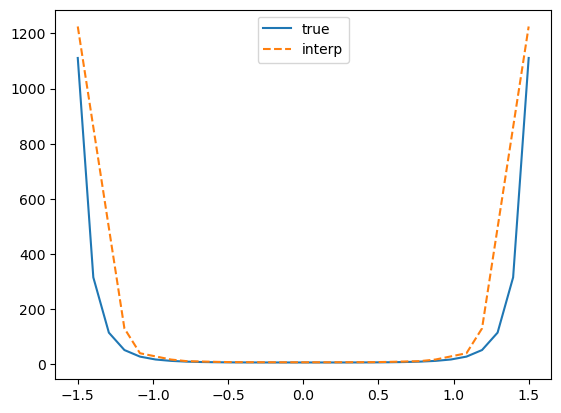

In [77]:
plt.figure()
iy = 1
iz = 0
plt.plot(vals, vvals_true[:, iy, iz], '-', label = 'true')
plt.plot(vals, vvals_interp[:, iy, iz], '--', label = 'interp')
plt.legend()
plt.show()

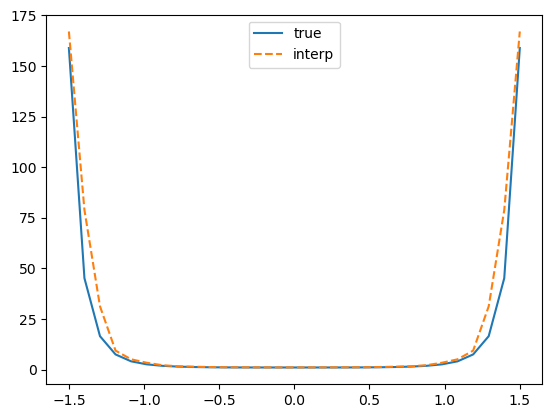

In [71]:
plt.figure()
ix = 15
iz = 1
plt.plot(vals, vvals_true[ix, iy, :], '-', label = 'true')
plt.plot(vals, vvals_interp[ix, iy, :], '--', label = 'interp')
plt.legend()
plt.show()

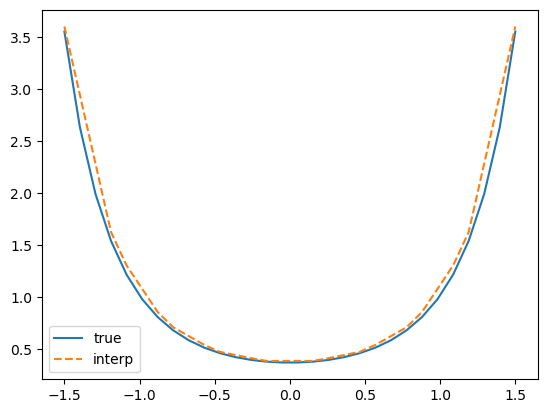

In [11]:
plt.figure()
ix = 5

plt.plot(vals, vvals_true[ix, :, 0], '-', label = 'true')
plt.plot(vals, vvals_interp[ix, :, 0], '--', label = 'interp')
plt.legend()
plt.show()

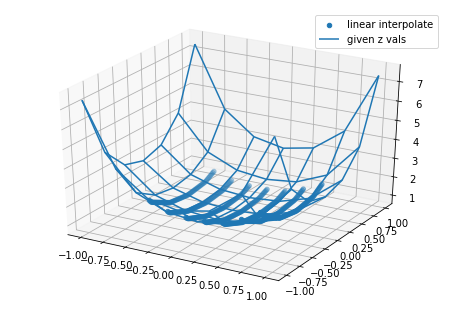

In [17]:
#inter- and extra- polate
xvals = np.linspace(-0.5, 0.7, 7)
yvals = np.linspace(-0.7, 0.5, 60)
xxvals, yyvals = np.meshgrid(xvals, yvals)

xyvals = np.array((xxvals.flatten(), yyvals.flatten()))
# zvals = fem2deval(xyvals, nodes, nodes, zz)

zvals = fem2deval_mesh(xvals ,yvals, nodes, nodes, zz)
zvals2 = RectBivariateSpline(nodes, nodes, zz,kx = 1, ky = 1)(xvals, yvals)

fig = plt.figure()
ax = Axes3D(fig)

#ax.plot_wireframe(xx, yy, zz)
ax.scatter(xxvals, yyvals, zvals.T, label = 'linear interpolate')
ax.plot_wireframe(xxnodes, yynodes, zz.T, label = 'given z vals')
plt.legend()
plt.show()



In [18]:
zvals - zvals2

array([[  0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   2.220e-16,  -2.220e-16,   4.441e-16,
         -2.220e-16,   0.000e+00,  -2.220e-16,   0.000e+00,  -2.220e-16,   0.000e+00,   0.000e+00,   0.000e+00,
          0.000e+00,   0.000e+00,   0.000e+00,   4.441e-16,   0.000e+00,   6.661e-16,   2.220e-16,   0.000e+00,
          4.441e-16,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   2.220e-16,   0.000e+00,
          0.000e+00,   0.000e+00,   0.000e+00,  -2.220e-16,   2.220e-16,   2.220e-16,   0.000e+00,   0.000e+00,
         -2.220e-16,   0.000e+00,   0.000e+00,   0.000e+00,  -4.441e-16,   0.000e+00,  -2.220e-16,   0.000e+00,
          0.000e+00,   0.000e+00,   0.000e+00,  -2.220e-16,  -2.220e-16,  -2.220e-16,   0.000e+00,   2.220e-16,
          0.000e+00,   0.000e+00,  -2.220e-16,  -2.220e-16],
       [ -2.220e-16,  -2.220e-16,   0.000e+00,   0.000e+00,   2.220e-16,   0.000e+00,  -2.220e-16,   4.441e-16,
          0.000e+00,   0.000e+00,   0.000e+

In [254]:
1 // 10

0

In [268]:
@nb.jit(nopython = True)    
def unravel_index_2d(num, dim_x, dim_y):
    
    ind_y = (num) % dim_y 
    ind_x = (num ) // dim_y
    
    return ind_x, ind_y

In [270]:
for i in range(0,100):
    print(unravel_index_2d(i, 7, 13), end = '')
    print(np.unravel_index(i, (7, 13)))

(0, 0)(0, 0)
(0, 1)(0, 1)
(0, 2)(0, 2)
(0, 3)(0, 3)
(0, 4)(0, 4)
(0, 5)(0, 5)
(0, 6)(0, 6)
(0, 7)(0, 7)
(0, 8)(0, 8)
(0, 9)(0, 9)
(0, 10)(0, 10)
(0, 11)(0, 11)
(0, 12)(0, 12)
(1, 0)(1, 0)
(1, 1)(1, 1)
(1, 2)(1, 2)
(1, 3)(1, 3)
(1, 4)(1, 4)
(1, 5)(1, 5)
(1, 6)(1, 6)
(1, 7)(1, 7)
(1, 8)(1, 8)
(1, 9)(1, 9)
(1, 10)(1, 10)
(1, 11)(1, 11)
(1, 12)(1, 12)
(2, 0)(2, 0)
(2, 1)(2, 1)
(2, 2)(2, 2)
(2, 3)(2, 3)
(2, 4)(2, 4)
(2, 5)(2, 5)
(2, 6)(2, 6)
(2, 7)(2, 7)
(2, 8)(2, 8)
(2, 9)(2, 9)
(2, 10)(2, 10)
(2, 11)(2, 11)
(2, 12)(2, 12)
(3, 0)(3, 0)
(3, 1)(3, 1)
(3, 2)(3, 2)
(3, 3)(3, 3)
(3, 4)(3, 4)
(3, 5)(3, 5)
(3, 6)(3, 6)
(3, 7)(3, 7)
(3, 8)(3, 8)
(3, 9)(3, 9)
(3, 10)(3, 10)
(3, 11)(3, 11)
(3, 12)(3, 12)
(4, 0)(4, 0)
(4, 1)(4, 1)
(4, 2)(4, 2)
(4, 3)(4, 3)
(4, 4)(4, 4)
(4, 5)(4, 5)
(4, 6)(4, 6)
(4, 7)(4, 7)
(4, 8)(4, 8)
(4, 9)(4, 9)
(4, 10)(4, 10)
(4, 11)(4, 11)
(4, 12)(4, 12)
(5, 0)(5, 0)
(5, 1)(5, 1)
(5, 2)(5, 2)
(5, 3)(5, 3)
(5, 4)(5, 4)
(5, 5)(5, 5)
(5, 6)(5, 6)
(5, 7)(5, 7)
(5, 8)(5, 8)
(5, 9)(5

ValueError: invalid entry in index array

In [250]:
unravel_index_2d(np.argmin(zvals), 7,60)

(6, 54)

In [251]:
np.unravel_index(np.argmin(zvals), dims = ( 7, 60))

(6, 24)

In [214]:
np.argmin(zvals)

174

In [245]:
zvals[6, 24]

1.0059755458682302

In [215]:
zvals.flatten()[174]

1.0059755458682302

In [236]:
zvals

array([[ 12.113,  11.457,  10.801,  10.144,   9.488,   8.832,   8.175,   7.519,   6.917,   6.666,   6.416,   6.165,
          5.915,   5.665,   5.414,   5.164,   4.962,   4.896,   4.829,   4.762,   4.696,   4.629,   4.563,   4.496,
          4.483,   4.549,   4.616,   4.683,   4.749,   4.816,   4.882,   4.949,   5.114,   5.364,   5.614,   5.865,
          6.115,   6.366,   6.616,   6.867,   7.388,   8.044,   8.7  ,   9.357,  10.013,  10.669,  11.326,  11.982,
         12.638,  13.295,  13.951,  14.608,  15.264,  15.92 ,  16.577,  17.233,  17.889,  18.546,  19.202,  19.858],
       [  9.751,   9.223,   8.695,   8.166,   7.638,   7.109,   6.581,   6.053,   5.568,   5.366,   5.165,   4.963,
          4.762,   4.56 ,   4.358,   4.157,   3.995,   3.941,   3.887,   3.834,   3.78 ,   3.727,   3.673,   3.619,
          3.609,   3.662,   3.716,   3.769,   3.823,   3.877,   3.93 ,   3.984,   4.116,   4.318,   4.52 ,   4.721,
          4.923,   5.124,   5.326,   5.528,   5.947,   6.475,   7.004, 

In [235]:
np.argmin(zvals)

384

(0, 0)(0, 0)
(1, 0)(0, 1)
(2, 0)(0, 2)
(3, 0)(0, 3)
(4, 0)(0, 4)
(5, 0)(0, 5)
(6, 0)(0, 6)
(7, 0)(0, 7)
(8, 0)(0, 8)
(9, 0)(0, 9)
(10, 0)(0, 10)
(11, 0)(0, 11)
(0, 1)(0, 12)
(1, 1)(1, 0)
(2, 1)(1, 1)
(3, 1)(1, 2)
(4, 1)(1, 3)
(5, 1)(1, 4)
(6, 1)(1, 5)
(7, 1)(1, 6)
(8, 1)(1, 7)
(9, 1)(1, 8)
(10, 1)(1, 9)
(11, 1)(1, 10)
(0, 2)(1, 11)
(1, 2)(1, 12)
(2, 2)(2, 0)
(3, 2)(2, 1)
(4, 2)(2, 2)
(5, 2)(2, 3)
(6, 2)(2, 4)
(7, 2)(2, 5)
(8, 2)(2, 6)
(9, 2)(2, 7)
(10, 2)(2, 8)
(11, 2)(2, 9)
(0, 3)(2, 10)
(1, 3)(2, 11)
(2, 3)(2, 12)
(3, 3)(3, 0)
(4, 3)(3, 1)
(5, 3)(3, 2)
(6, 3)(3, 3)
(7, 3)(3, 4)
(8, 3)(3, 5)
(9, 3)(3, 6)
(10, 3)(3, 7)
(11, 3)(3, 8)
(0, 4)(3, 9)
(1, 4)(3, 10)
(2, 4)(3, 11)
(3, 4)(3, 12)
(4, 4)(4, 0)
(5, 4)(4, 1)
(6, 4)(4, 2)
(7, 4)(4, 3)
(8, 4)(4, 4)
(9, 4)(4, 5)
(10, 4)(4, 6)
(11, 4)(4, 7)
(0, 5)(4, 8)
(1, 5)(4, 9)
(2, 5)(4, 10)
(3, 5)(4, 11)
(4, 5)(4, 12)
(5, 5)(5, 0)
(6, 5)(5, 1)
(7, 5)(5, 2)
(8, 5)(5, 3)
(9, 5)(5, 4)
(10, 5)(5, 5)
(11, 5)(5, 6)
(0, 6)(5, 7)
(1, 6)(5, 8)
(2, 6)(5, 9